In [86]:
import numpy as np, uproot as ur, awkward as ak, pandas as pd, uproot as ur
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import mplhep as hep
hep.style.use("CMS")

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'
plt.rcParams['legend.frameon']=True
plt.rcParams['legend.edgecolor']='white'
import uproot,glob,ROOT

In [87]:
arrays={}
for particle in "proton",:
    for nlayers in 10, 15, 20,25,30,40, 60:
        arrays[nlayers, particle]=ur.open(f"sim_out/{particle}_2_GeV_{nlayers}_layers.edm4hep.root:events").arrays()
    

In [88]:
for particle in "Fe56",:
    for nlayers in 10, 15, 20,25,30,40, 60:
        arrays[nlayers, particle]=ur.open(f"sim_out/{particle}_56_GeV_{nlayers}_layers.edm4hep.root:events").arrays()

In [89]:
for particle in "mu-",:
    for nlayers in 10, 15, 20,25,30,40, 60:
        arrays[nlayers, particle]=ur.open(f"sim_out/{particle}_2_GeV_{nlayers}_layers.edm4hep.root:events").arrays()
    

In [91]:
for particle in "e+",:
    for nlayers in 10, 15, 20,25,30,40, 60:
        arrays[nlayers, particle]=ur.open(f"sim_out/{particle}_4_GeV_{nlayers}_layers.edm4hep.root:events").arrays()

In [92]:
# #for testing if a particle produced in the GPS has the same response as a normal particle gun particle.  
# for particle in "H1",:
#     for nlayers in 10, 15, 20,25,30,40, 60:
#         arrays[nlayers, particle]=ur.open(f"{particle}_2000_MeV_{nlayers}_layers.edm4hep.root:events").arrays()

In [93]:
for a in arrays.values():
    z=a['HcalFarForwardZDCHits.position.z']
    a['HcalFarForwardZDCHits.layer']=np.round((z-1022.75)/(1049.45-1022.75))

Text(1, 0, 'hit energy [MeV]')

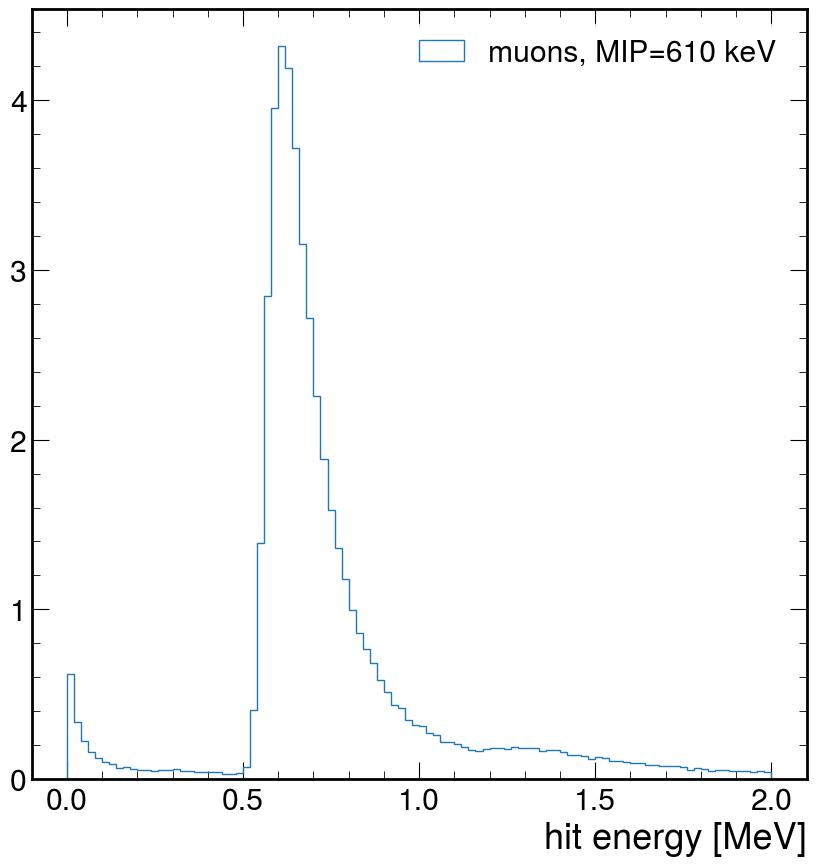

In [94]:
key=20,"mu-"
y,x,_=plt.hist(ak.flatten(arrays[key]['HcalFarForwardZDCHits.energy'])*1000, label=f'muons',histtype='step', 
                 bins=100, range=(0, 2), density=True)
bc=(x[1:]+x[:-1])/2
MIP=list(bc[y==max(y)])[0]/1000.
plt.legend(labels=[f'muons, MIP={MIP*1000000:.0f} keV'])
plt.xlabel("hit energy [MeV]")

In [95]:
def energy_per_hit_plot(a):
    layers=np.linspace(0, 59, 60)
    means=[]
    stds=[]
    #print(set(ak.flatten(a['HcalFarForwardZDCHits.layer'])))
    tol=0.1
    for layer in layers:
        selection=(np.abs(a['HcalFarForwardZDCHits.layer']-layer)<tol)&(a['HcalFarForwardZDCHits.energy']>0.5*MIP)
        b=np.sum((a['HcalFarForwardZDCHits.energy']/MIP)[selection], axis=-1)
        #b=b[np.sum(a['HcalFarForwardZDCHits.energy'], axis=-1)>20*MIP]
        mean=np.mean(b)
        means.append(mean)
        std=np.std(b)
        stds.append(std)
    #print(layers, np.array(means), np.array(stds))

    plt.errorbar(layers, means, stds, capsize=4, marker='o', ls='')

(0.0, 11.452513693155318)

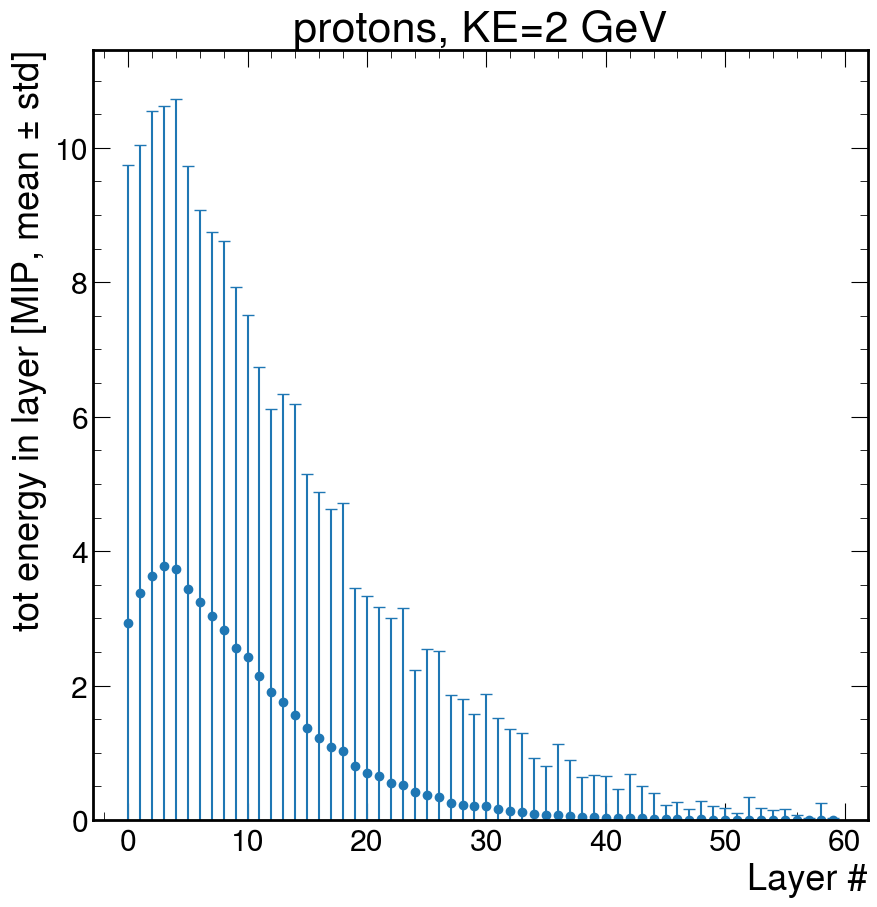

In [96]:
#print(sorted(list(set(ak.flatten(arrays[(60, "proton")]['HcalFarForwardZDCHits.position.z'])))))


energy_per_hit_plot(arrays[(60, "proton")])
plt.ylabel("tot energy in layer [MIP, mean $\pm$ std]")
plt.xlabel("Layer #")
plt.title("protons, KE=2 GeV")
plt.ylim(0)

Text(0.5, 1.0, 'protons, KE=2 GeV')

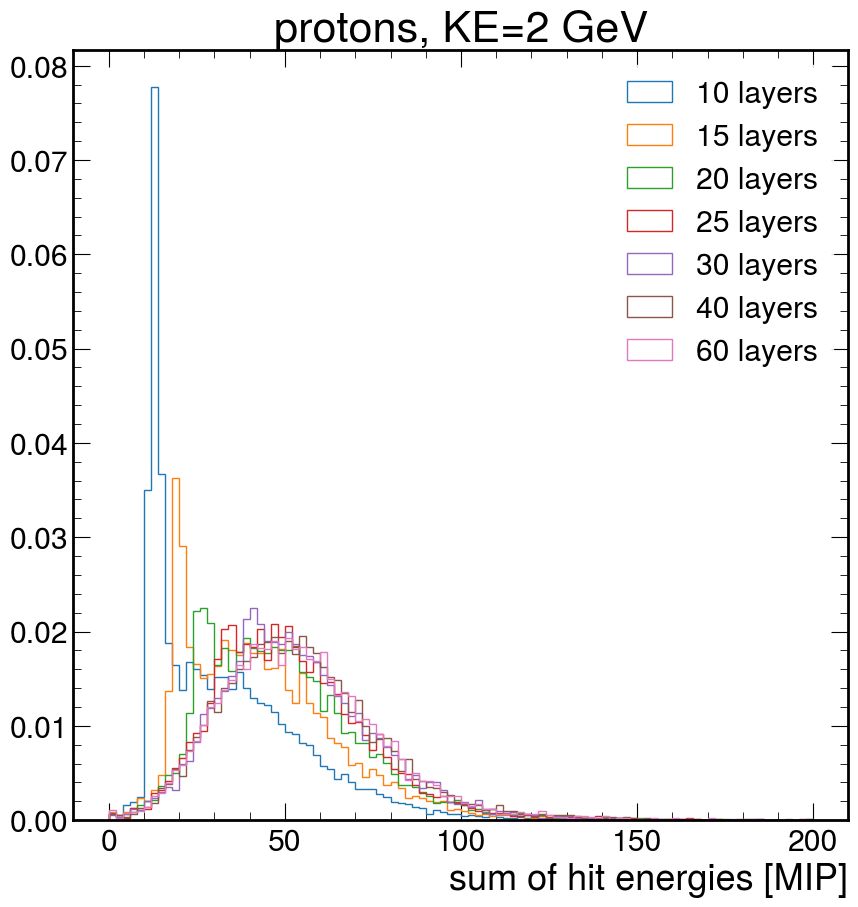

In [97]:
for key in arrays:
    #print(key)
    if "proton" ==key[1]:
        plt.hist(np.sum(arrays[key]['HcalFarForwardZDCHits.energy']/MIP, axis=-1), label=f'{key[0]} layers',histtype='step', bins=100,
                density=True, range=(0, 200))
plt.legend()
plt.xlabel("sum of hit energies [MIP]")
plt.title("protons, KE=2 GeV")

In [98]:
# for key in arrays:
#     #print(key)
#     if "H1" ==key[1]:
#         plt.hist(np.sum(arrays[key]['HcalFarForwardZDCHits.energy']/MIP, axis=-1), label=f'{key[0]} layers',histtype='step', bins=100,
#                 density=True, range=(0, 200))
# plt.legend()
# plt.xlabel("sum of hit energies [MIP]")
# plt.title("protons, KE=2 GeV")

Text(0.5, 1.0, 'positrons, KE=4 GeV')

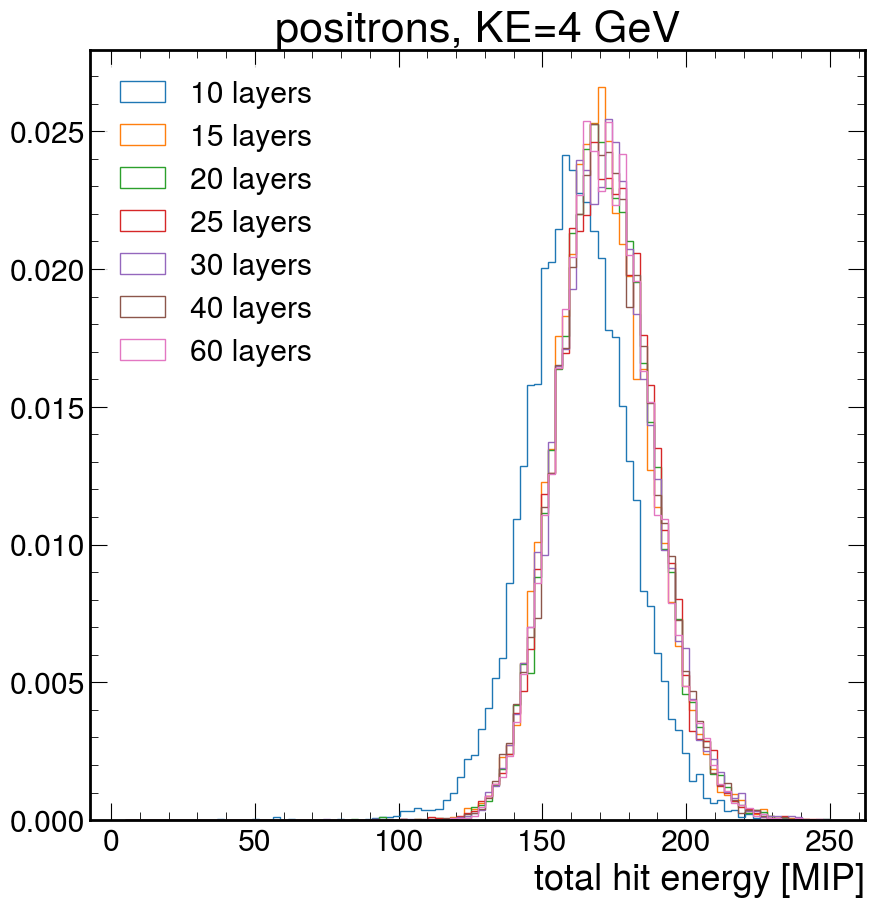

In [68]:
for key in arrays:
    #print(key)
    if "e+" ==key[1] and key[0]<80:
        plt.hist(np.sum(arrays[key]['HcalFarForwardZDCHits.energy']/MIP, axis=-1), label=f'{key[0]} layers',histtype='step', bins=100,
                density=True, range=(5, 250))
plt.legend()
plt.xlabel("total hit energy [MIP]")
plt.title("positrons, KE=4 GeV")

(0.0, 38.96456364897172)

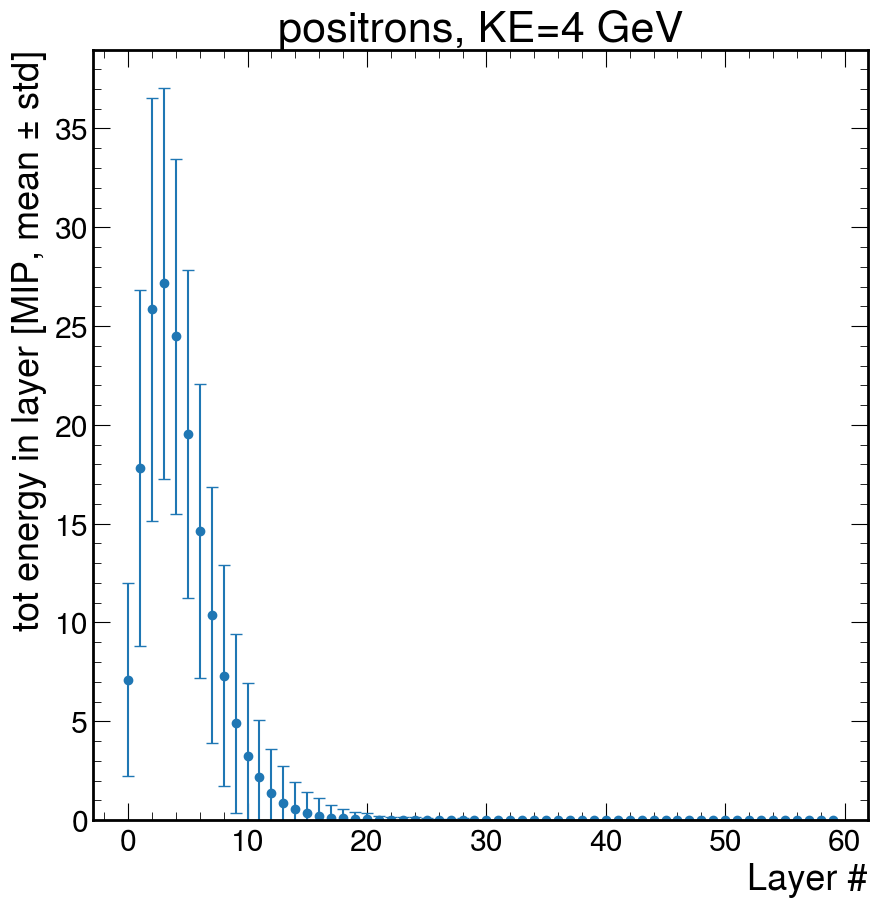

In [93]:


energy_per_hit_plot(arrays[(60, "e+")])
plt.ylabel("tot energy in layer [MIP, mean $\pm$ std]")
plt.xlabel("Layer #")
plt.title("positrons, KE=4 GeV")
plt.ylim(0)

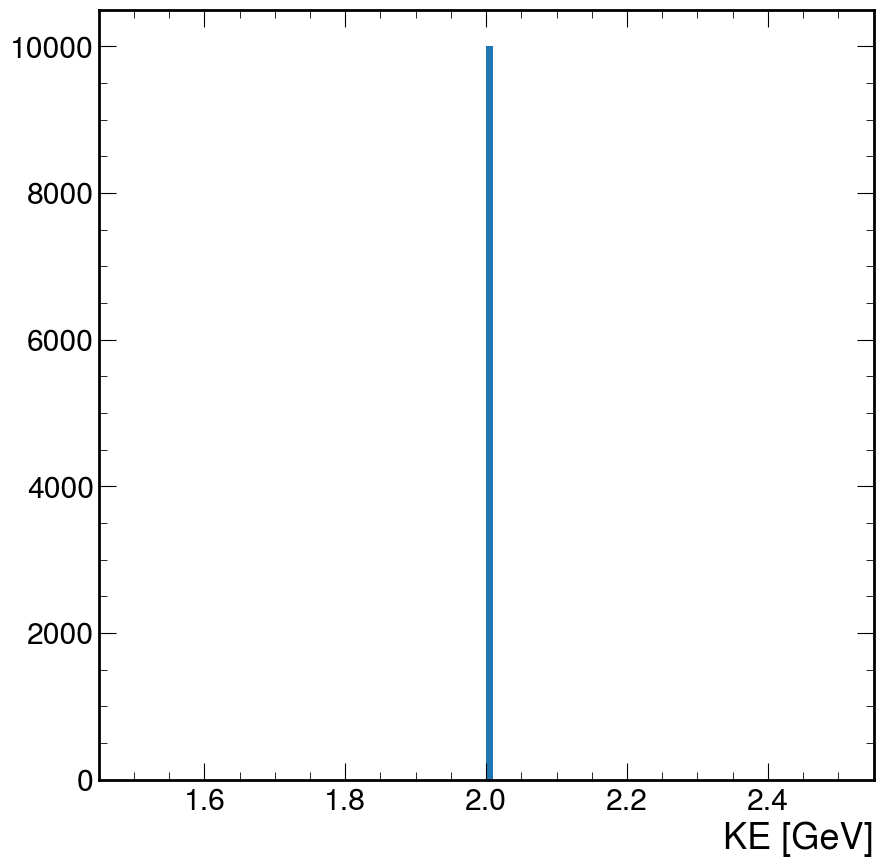

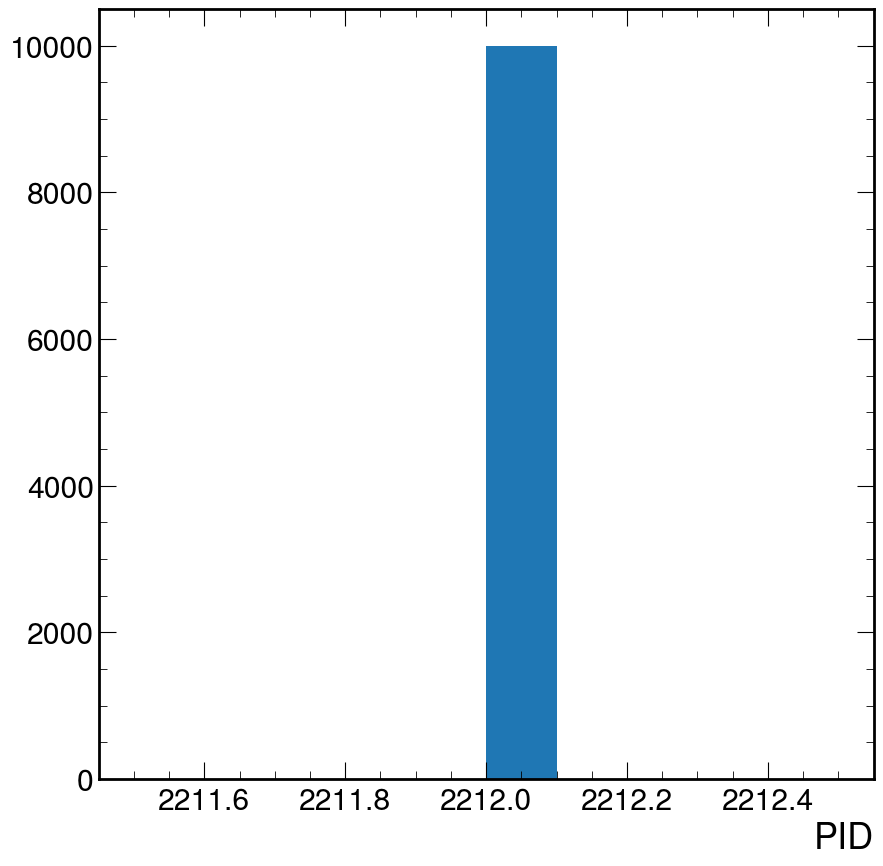

In [104]:
#check that the energy is the kinetic energy.  Should have a delta function at 2 GeV. 
pz=arrays[20,'proton']['MCParticles.momentum.z']
mass=arrays[20,'proton']['MCParticles.mass']
status=arrays[20,'proton']['MCParticles.generatorStatus']
PID=arrays[20,'proton']['MCParticles.PDG']
plt.hist(np.sqrt(ak.flatten(pz[(status==1)])**2+mass[status==1]**2)-mass[status==1],bins=100)
plt.xlabel("KE [GeV]")
plt.show()
#also check the pid of the particle thrown
plt.hist(PID[status==1])
plt.xlabel("PID")
plt.show()
#1000260560

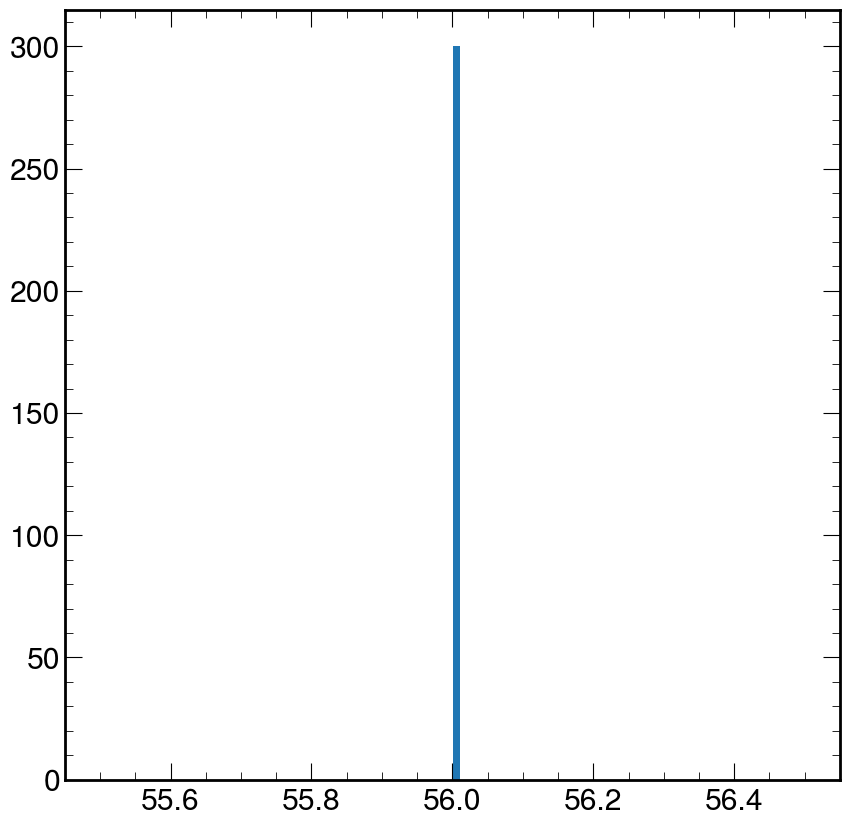

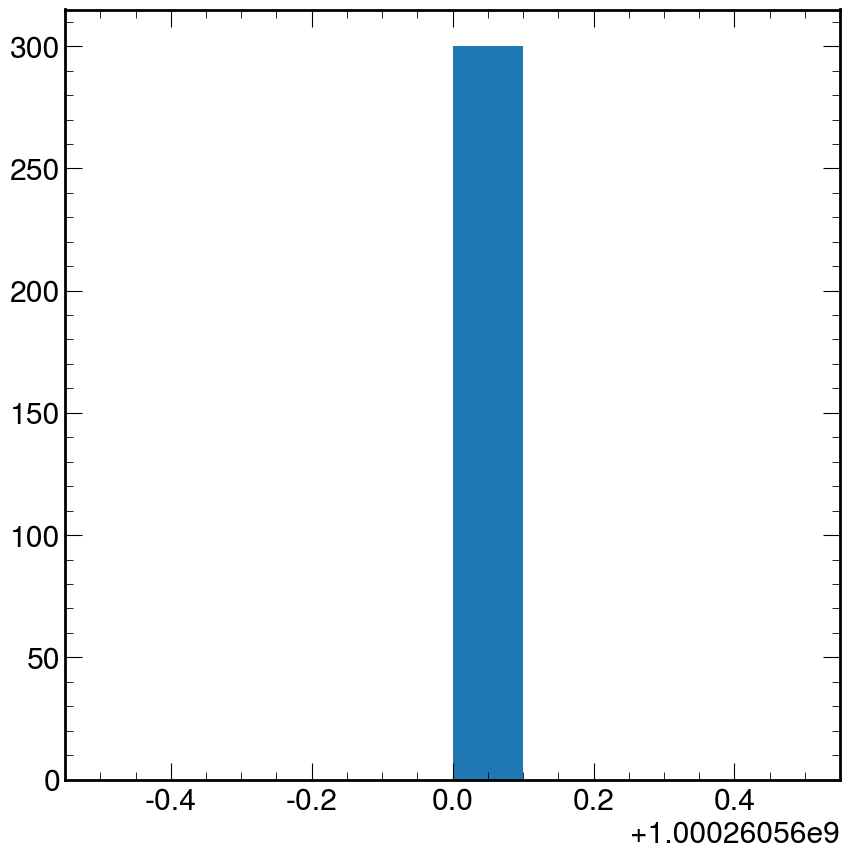

1000260560

In [174]:
pz=arrays[20,'Fe56']['MCParticles.momentum.z']
status=arrays[20,'Fe56']['MCParticles.generatorStatus']
PID=arrays[20,'Fe56']['MCParticles.PDG']
mFe56=52.102521
plt.hist(np.sqrt(ak.flatten(pz[(status==1)])**2+mFe56**2)-mFe56,bins=100)
plt.show()
plt.hist(PID[status==1])
plt.show()
1000260560

Text(0.5, 1.0, 'Fe56, KE=56 GeV')

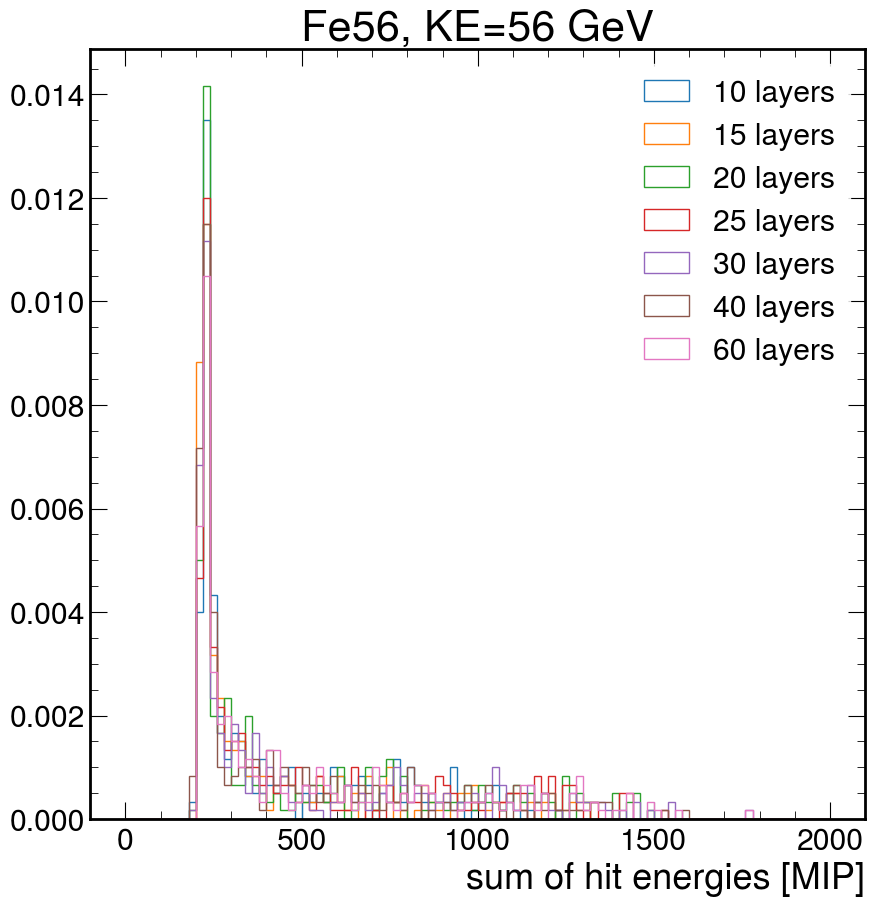

In [99]:
for key in arrays:
    #print(key)
    if "Fe56" ==key[1]:
        E=arrays[key]['HcalFarForwardZDCHits.energy']
        plt.hist(np.sum(E[E>-0.1*MIP]/MIP, axis=-1)[np.sum(E[E>0.1*MIP]**0,axis=-1)>0], label=f'{key[0]} layers',histtype='step', bins=100,
                density=True, range=(0, 2000))
plt.legend()
plt.xlabel("sum of hit energies [MIP]")
plt.title("Fe56, KE=56 GeV")

Text(0.5, 1.0, 'Fe56, KE=56 GeV')

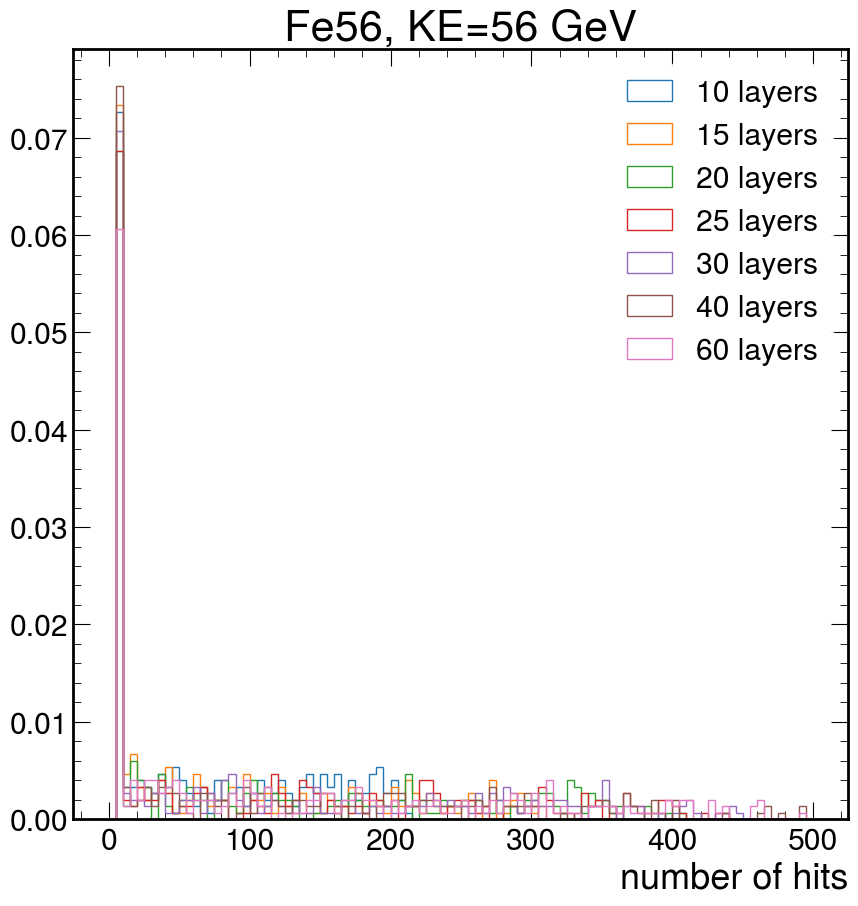

In [100]:
for key in arrays:
    #print(key)
    if "Fe56" ==key[1]:
        E=arrays[key]['HcalFarForwardZDCHits.energy']
        plt.hist(np.sum(E[E>-1*MIP]**0, axis=-1), label=f'{key[0]} layers',histtype='step', bins=100,
                density=True, range=(0, 500))
plt.legend()
plt.xlabel("number of hits")
plt.title("Fe56, KE=56 GeV")

In [50]:
print(arrays[(60, "Fe56")].fields)

['EventHeader.eventNumber', 'EventHeader.runNumber', 'EventHeader.timeStamp', 'EventHeader.weight', 'HcalFarForwardZDCHits.cellID', 'HcalFarForwardZDCHits.energy', 'HcalFarForwardZDCHits.position.x', 'HcalFarForwardZDCHits.position.y', 'HcalFarForwardZDCHits.position.z', 'HcalFarForwardZDCHits.contributions_begin', 'HcalFarForwardZDCHits.contributions_end', '_HcalFarForwardZDCHits_contributions.index', '_HcalFarForwardZDCHits_contributions.collectionID', 'HcalFarForwardZDCHitsContributions.PDG', 'HcalFarForwardZDCHitsContributions.energy', 'HcalFarForwardZDCHitsContributions.time', 'HcalFarForwardZDCHitsContributions.stepPosition.x', 'HcalFarForwardZDCHitsContributions.stepPosition.y', 'HcalFarForwardZDCHitsContributions.stepPosition.z', '_HcalFarForwardZDCHitsContributions_particle.index', '_HcalFarForwardZDCHitsContributions_particle.collectionID', 'MCParticles.PDG', 'MCParticles.generatorStatus', 'MCParticles.simulatorStatus', 'MCParticles.charge', 'MCParticles.time', 'MCParticles.m

[]


/var/folders/_x/mzz2_hcx0dg4mv6b9blzjpp40000gn/T/ipykernel_39892/548707110.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=mpl.cm.get_cmap("viridis")


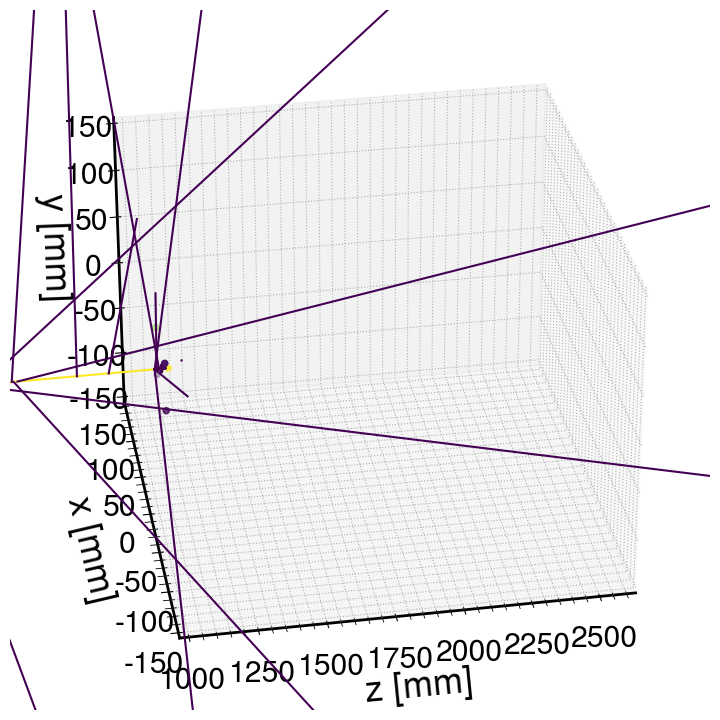

[]


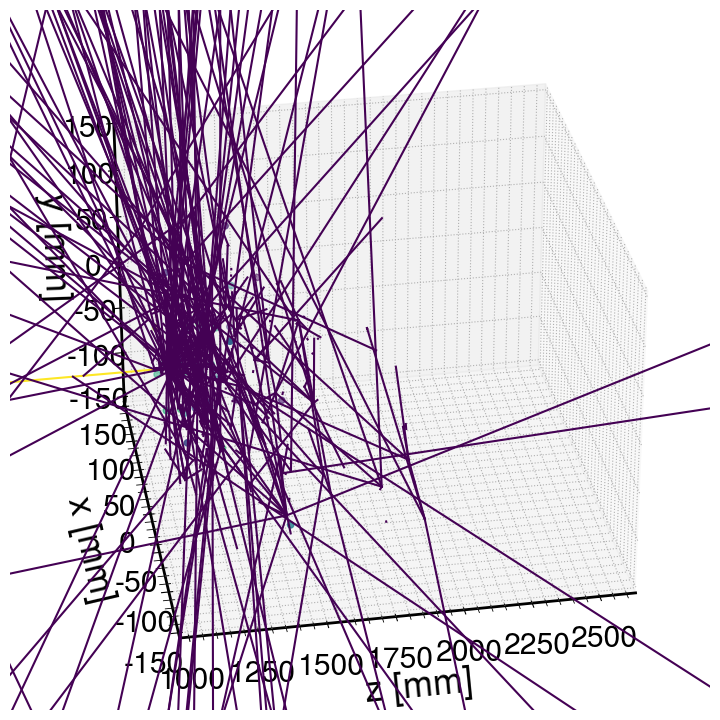

[]


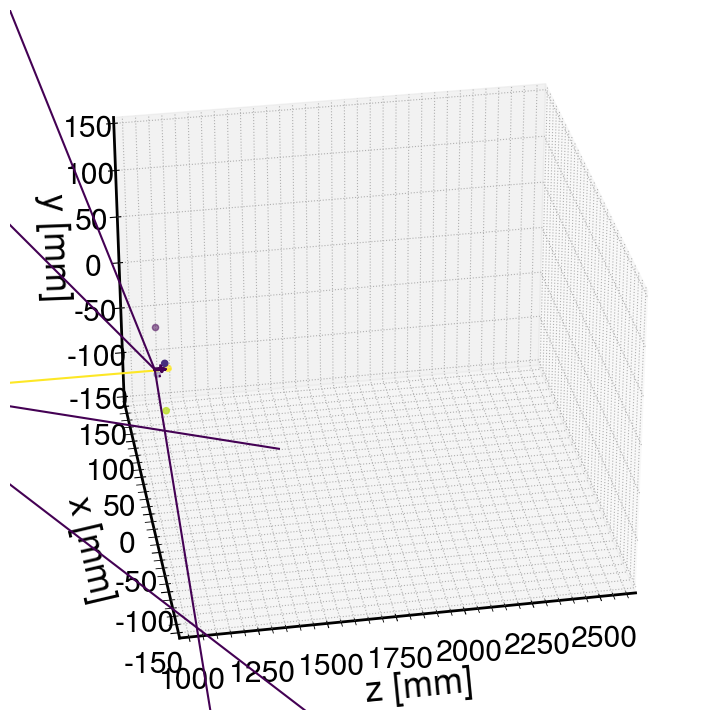

[]


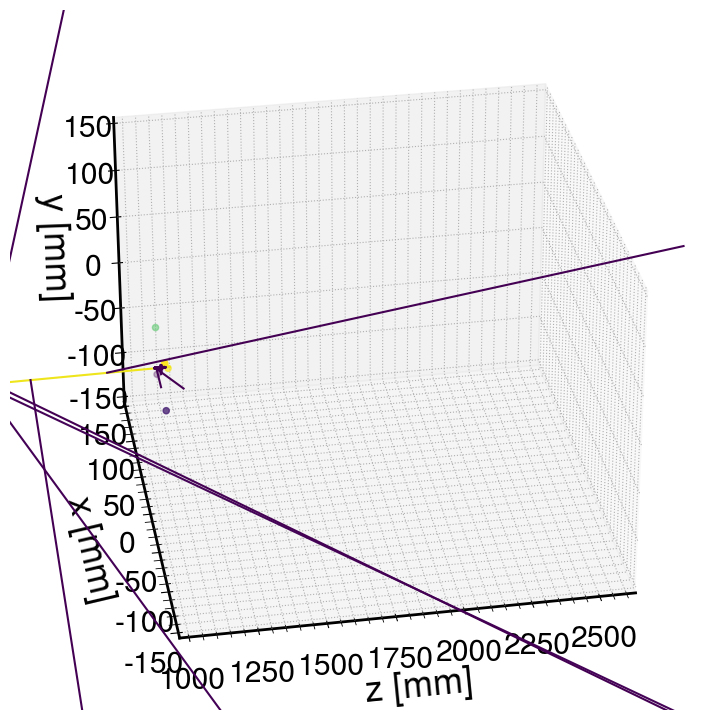

[]


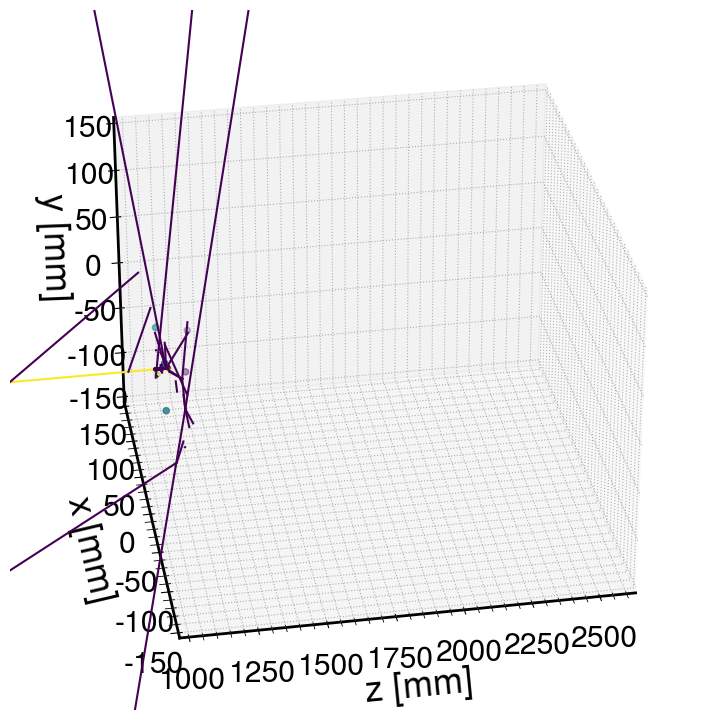

[]


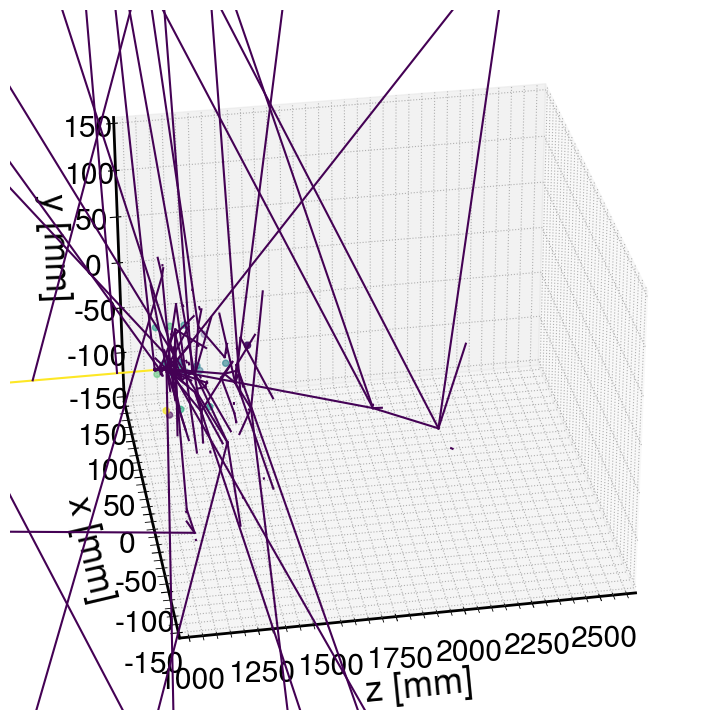

[]


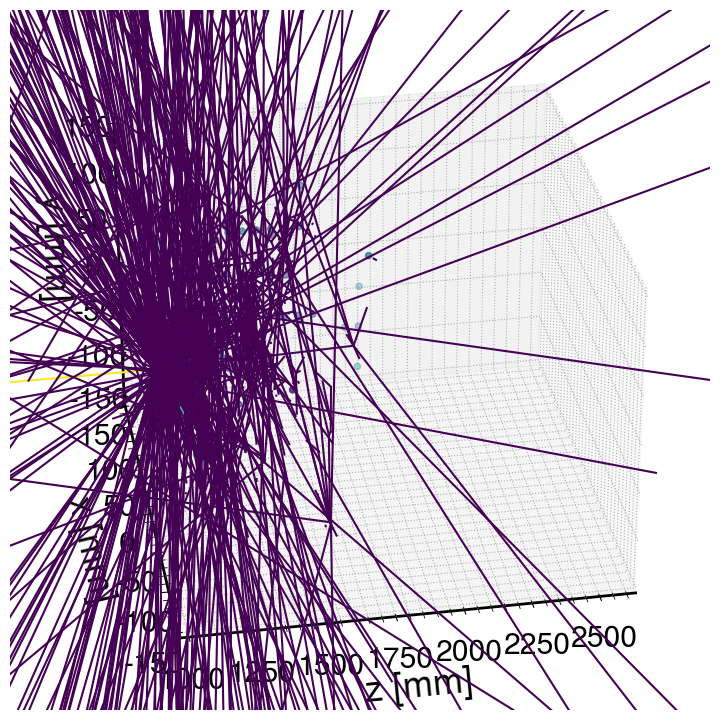

[]


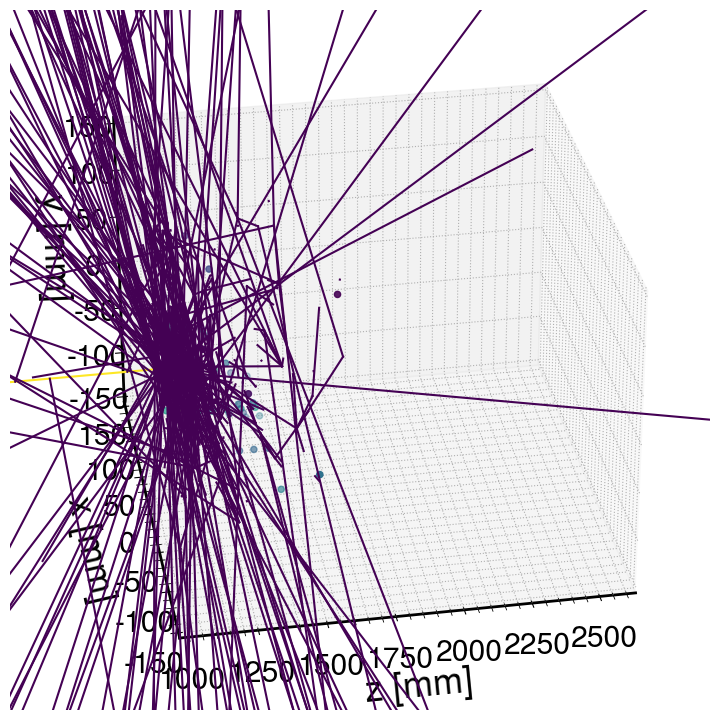

[]


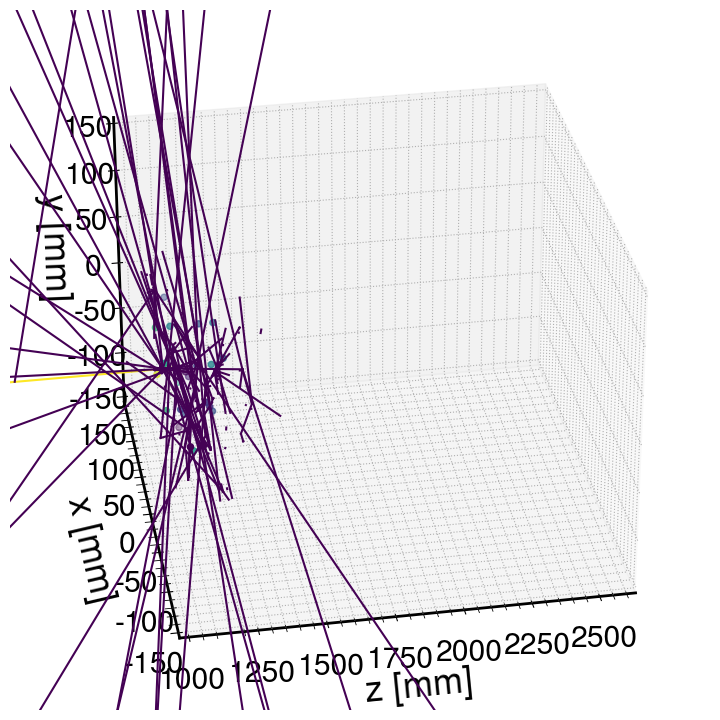

[]


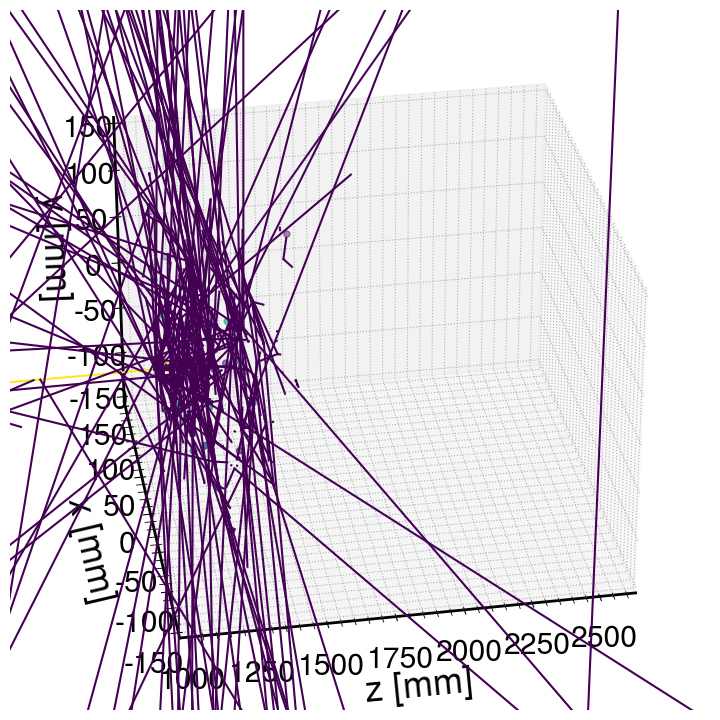

In [101]:
import matplotlib as mpl
def event_display(a,evt, showHits=True, showParticles=True):
    #print(a.fields)
    #print(np.min(a[f"HcalFarForwardZDCHits.position.z"]))
    fig=plt.figure( figsize=(30,20))
    ax1 = fig.add_subplot(211, projection='3d',azim=-100, elev=30,computed_zorder=False)
    if showHits:
        x,y,z=(a[f"HcalFarForwardZDCHits.position.{d}"][evt] for d in "xyz")
        E=a[f"HcalFarForwardZDCHits.energy"][evt]
        #help(ax1.scatter3D)
        slc=E>MIP/2
        ax1.scatter3D(z[slc],x[slc],y[slc],c=E[slc], norm=mpl.colors.LogNorm())
    if showParticles:
        (xs,xe),(ys,ye),(zs,ze)=[[a[f"MCParticles.{b}.{d}"][evt] for b in "vertex endpoint".split()] for d in "xyz"]
        KE=np.sqrt(a[f"MCParticles.momentum.x"][evt]**2
           +a[f"MCParticles.momentum.y"][evt]**2
           +a[f"MCParticles.momentum.z"][evt]**2+a[f"MCParticles.mass"][evt]**2)-a[f"MCParticles.mass"][evt]
        #PID=a[f"MCParticles.PDG"][evt]
        #print(PID)
        print(KE[KE<0.001])
        cmap=mpl.cm.get_cmap("viridis")
        #help(cmap)
        for i in range(len(xs)):
            plt.plot((ze[i], zs[i]), (xe[i], xs[i]),(ye[i], ys[i]), color=cmap(KE[i]/56))
    #print(x, y, z)
    #print(len(x))
    ax1.set_zlim(-150, 150)
    ax1.set_xlim(1000, 2600)
    ax1.set_ylim(-150, 150)
    ax1.set_xlabel("\nz [mm]")
    ax1.set_ylabel("\nx [mm]")
    ax1.set_zlabel("\ny [mm]")
    plt.show()

for i in range(10):
    event_display(arrays[(60, "Fe56")], i)

Text(0, 1, 'number of hits')

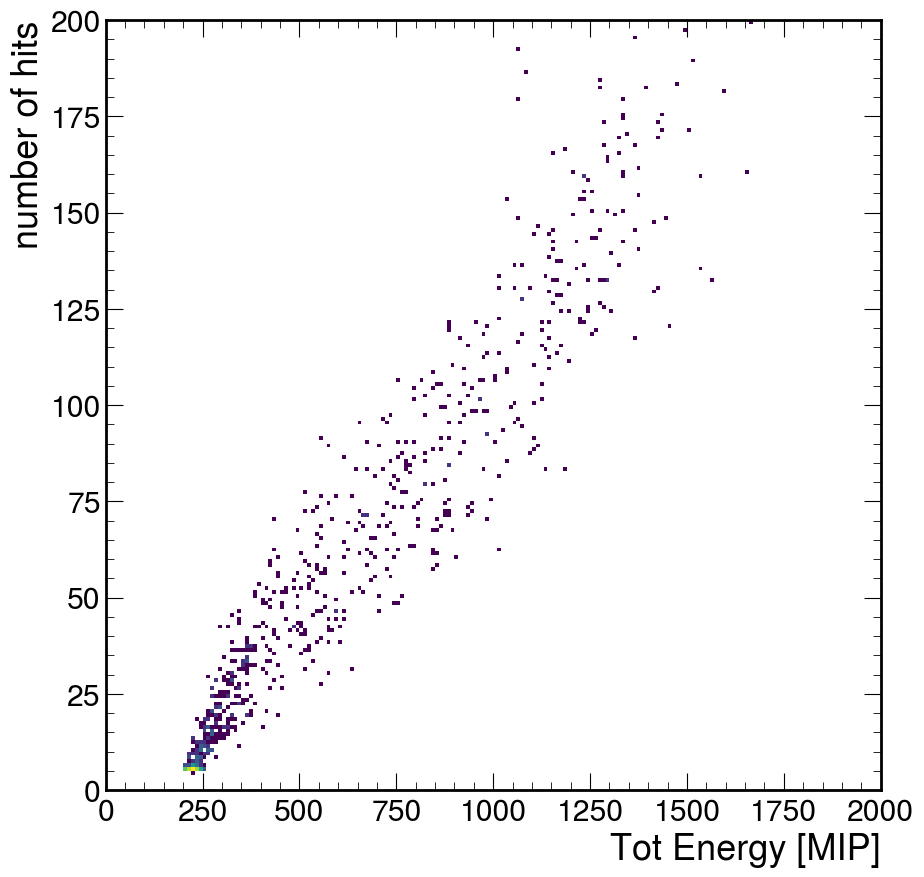

In [145]:
key=60,"Fe56"
E=arrays[key]['HcalFarForwardZDCHits.energy']
nhits=np.array(np.sum((E>0.5*MIP)*1, axis=-1))
Etot=np.array(np.sum(E[E>0.5*MIP], axis=-1))/MIP
len(nhits), len(Etot)
plt.hist2d(Etot, nhits, range=((0, 2000), (0, 200)), bins=(200,200), norm=colors.LogNorm())
plt.xlabel("Tot Energy [MIP]")
plt.ylabel("number of hits")
#plt.hist(Etot)

In [166]:
key=60,"Fe56"
z=arrays[key]['HcalFarForwardZDCHits.position.z']
E=arrays[key]['HcalFarForwardZDCHits.energy']
for evt in range(20):
    a=arrays[key]
    n=len(a['HcalFarForwardZDCHits.position.x'][evt])
    Etot=sum(a['HcalFarForwardZDCHits.energy'][evt])/MIP
    if n==5:
        print(a['HcalFarForwardZDCHits.position.x'][evt])
        print(a['HcalFarForwardZDCHits.position.y'][evt])
        print(a['HcalFarForwardZDCHits.position.z'][evt])
        print(a['HcalFarForwardZDCHits.energy'][evt]/MIP)
        print()

[-25, 25, 0, 25, -25]
[25, 25, 0, -25, -25]
[1.02e+03, 1.02e+03, 1.05e+03, 1.02e+03, 1.02e+03]
[53.1, 40.4, 106, 10.5, 7.66]

[-25, 0, 25, 25, -25]
[25, 0, 25, -25, -25]
[1.02e+03, 1.05e+03, 1.02e+03, 1.02e+03, 1.02e+03]
[74.6, 98.7, 18.4, 11.5, 12.8]

[25, 0, 25, -25, -25]
[-25, 0, 25, -25, 25]
[1.02e+03, 1.05e+03, 1.02e+03, 1.02e+03, 1.02e+03]
[70.9, 102, 27.6, 12.9, 12.4]



(10, 'proton')
(15, 'proton')
(20, 'proton')
(30, 'proton')
(40, 'proton')
(60, 'proton')
(10, 'mu-')
(15, 'mu-')
(20, 'mu-')
(30, 'mu-')
(40, 'mu-')
(60, 'mu-')


Text(1, 0, 'hit energy [MeV]')

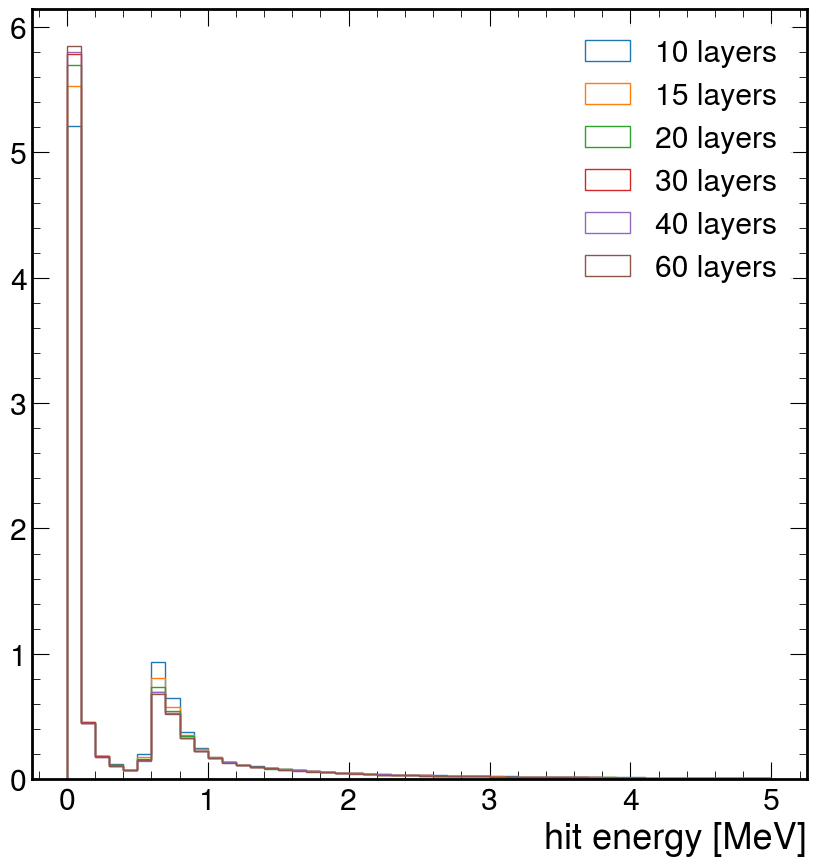

In [48]:
for key in arrays:
    print(key)
    if "proton" ==key[1]:
        plt.hist(ak.flatten(arrays[key]['HcalFarForwardZDCHits.energy'])*1000, label=f'{key[0]} layers',histtype='step', bins=50,
                density=True, range=(0,5))
plt.legend()
plt.xlabel("hit energy [MeV]")

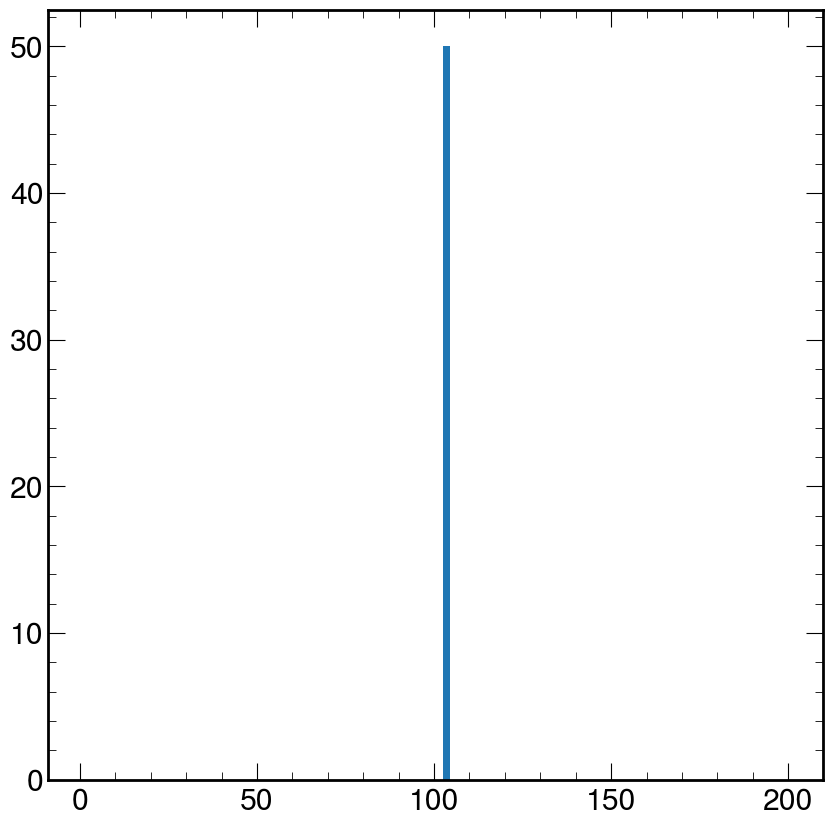

In [104]:
a=ur.open(f"test.root:events").arrays()
plt.hist(ak.flatten(np.hypot(a['MCParticles.momentum.z'], a['MCParticles.mass'])\
                    [(a["MCParticles.PDG"]==1000260560) &(a['MCParticles.generatorStatus']==1)]), bins=100, range=(1, 200))
plt.show()

In [88]:
set(ak.flatten(a['MCParticles.generatorStatus'][a["MCParticles.PDG"]==1000260560]))

{0, 1}

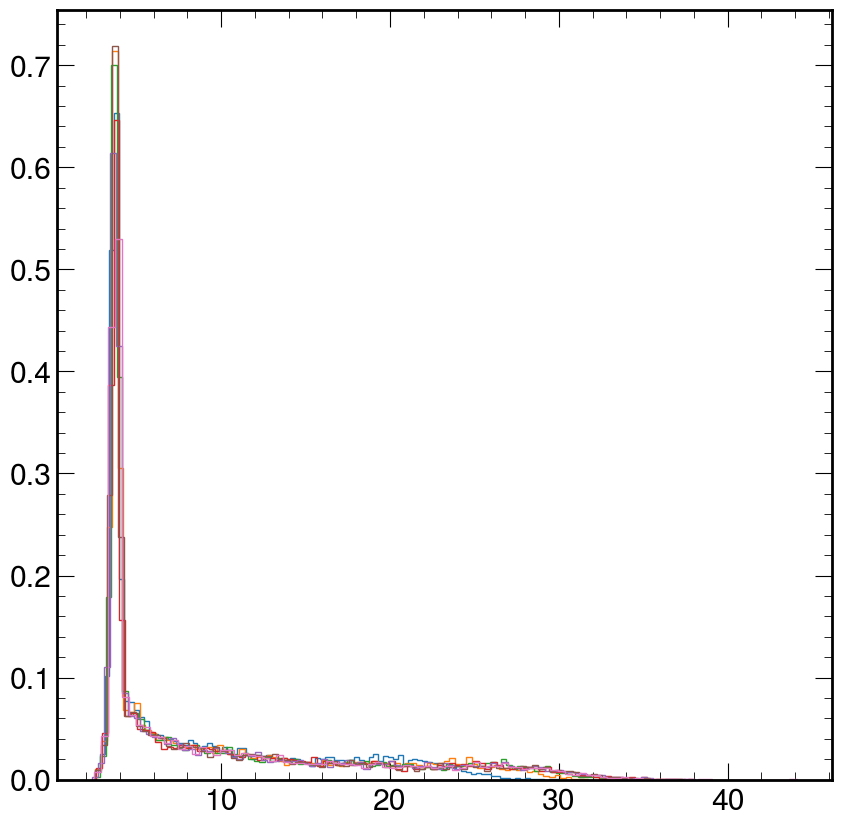

In [102]:
for key in arrays:
    #print(key)
    if "Fe56" ==key[1]:
        E=arrays[key]['HcalFarForwardZDCHits.energy']
        plt.hist(np.sum(E, axis=-1)*4/(170*MIP), label=f'{key[0]} layers',histtype='step', bins=100,
                density=True)

In [90]:
!ls Fe*

Fe56.mac                               Fe56_108103_MeV_25_layers.edm4hep.root
Fe56.mac~                              Fe56_108103_MeV_30_layers.edm4hep.root
Fe56_108103_MeV_10_layers.edm4hep.root Fe56_108103_MeV_40_layers.edm4hep.root
Fe56_108103_MeV_15_layers.edm4hep.root Fe56_108103_MeV_50_layers.edm4hep.root
Fe56_108103_MeV_20_layers.edm4hep.root Fe56_108103_MeV_60_layers.edm4hep.root
